#  Lab 1
## Digital Digit Recognition

#### ΔΜΠΣ ΕΠΙΣΤΗΜΗ ΔΕΔΟΜΕΝΩΝ & ΜΗΧΑΝΙΚΗ ΜΑΘΗΣΗ

#### Μέλος 1: Δημήτρης Παπαμαύρος
#### Μέλος 2: Ορφανουδάκης Φίλιππος Σκόβελεφ

First of all let's import the necessary modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1

Next we read the data (train.txt, text.txt) in compatible type with sklearn (numpy.ndarray). Train data are splitted to labels, `y_train`, and actual data, `X_train`, which contain a shade of black for the corresponding pixel. In total we have 7291 handwritten digits in train set (2007 handwritten digits in test set) which consists of 256 'pixel' each. The same split is performed to test data.

In [2]:
f = np.loadtxt("pr_lab1_2020-21_data/train.txt")
X_train = f[:, 1:]
y_train = f[:, 0]

f = np.loadtxt("pr_lab1_2020-21_data/test.txt")
X_test = f[:, 1:]
y_test = f[:, 0]

# to make sure data have been read correctly we check their shapes 
print('y_train shape is {0}, X_train shape is {1}'.format(y_train.shape, X_train.shape))
print('y_test shape is {0}, X_test shape is {1}'.format(y_test.shape, X_test.shape))

y_train shape is (7291,), X_train shape is (7291, 256)
y_test shape is (2007,), X_test shape is (2007, 256)


## Step 2

Now we have to plot the 131th digit. To do so we need to reshape pixel to (16x16) and use `plt.imshow`

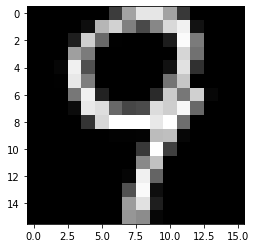

In [3]:
plt.imshow(X_train[131].reshape(16,16), cmap='gray'); #cmap = 'gray' for grayscale

## Step 3

In this step we repeat the same process as above but now choosing randomly one digit from every category

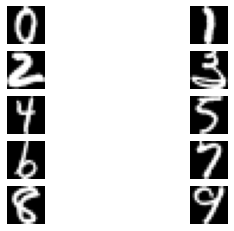

In [4]:
np.random.seed(1312) # for same results
for i in range(9,-1,-1):
    # subset contains all the train data corresponding to i-digit
    subset = X_train[y_train == i]
    # choose randomly one observation and then plot it
    digit = subset[np.random.choice(subset.shape[0], 1), :]
    plt.subplot(5, 2, i+1)
    plt.imshow(digit.reshape(16, 16), cmap='gray')
    plt.axis('off');

## Step 4

Calculate the mean for __pixel (10x10)__ in 0-digits

In [5]:
# if you look carefull the above for loop you can easily see that 
# subset contains all the observations corresponding to 0-digits

np.mean([subset[i, ].reshape(16, 16)[10, 10] for i in range(subset.shape[0])])

-0.5041884422110553

## Step 5

Calculate the variance for __pixel (10x10)__ in 0-digits

In [6]:
np.var([subset[i, ].reshape(16, 16)[10, 10] for i in range(subset.shape[0])])

0.5245221428814929

## Step 6

Calculate the mean for __all pixels__ in 0-digits

In [7]:
mean = np.mean(X_train[y_train == 0.0, ], axis = 0)
variance = np.var(X_train[y_train == 0.0, ], axis = 0)

## Step 7

Plot 0-digit using the mean values for its pixels

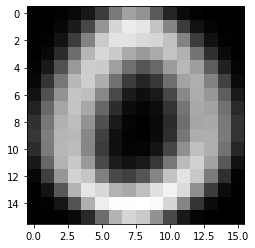

In [8]:
plt.imshow(mean.reshape(16,16), cmap='gray');

## Step 8

Plot 0-digit using the variance values for its pixels

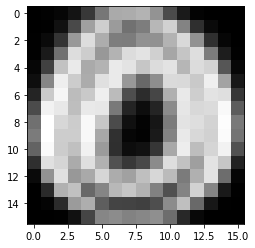

In [9]:
plt.imshow(variance.reshape(16,16), cmap='gray');

The two images are obviously different.

As excpected the 0-digit plotted using the values of variances is thicker than the one where mean values have been used. That has to do with the fact that the variance calculates how much our data points are spread whereas the mean calculates the central value, if our data are symmetric.

Of course if we had to choose one over the other that would be the image from the mean values of 0-digit.

## Step 9

First we calculate the `mean` and `variance` for `digits 0 - 9`.

In [10]:
means, variances = np.zeros((10,256)), np.zeros((10,256))
means[0, ], variances[0, ] = mean, variance # for 0-digit we have already calculated the in step 8 

for i in range(1,10):
    means[i, ], variances[i, ] = np.mean(X_train[y_train == i,], axis = 0), np.var(X_train[y_train == i,], axis = 0)

Plot `digits 0 - 9` using `mean` values

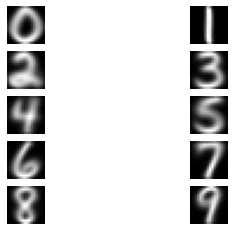

In [11]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(means[i].reshape(16,16), cmap='gray')
    plt.axis('off');

## Step 10

Using Eucliden Distance $dist(x, y) = \sqrt{\sum_{i=0}^n (x_i -y_i)^2}$ we can calculate the distance between the 101th digit and the mean values and then classify it with the same label as the closer one.

In [12]:
def euclid(X, m):
    """
    Calculate the Euclidean Distance between all digits X and all mean vectors m
    axis = 1*(X.ndim != 1) to take into account cases where we want the distance between one digit and all means
    """
    return np.array([np.sqrt(np.sum(np.square(X - m), axis = 1*(X.ndim != 1) )) for m in means])

ec = euclid(X_test[101,], means)
ec

array([11.8026265 , 17.02543574, 13.12059103, 13.60399136, 13.55168606,
       13.43187363, 13.5588511 , 15.91474892, 13.68922684, 14.6262146 ])

In [13]:
# find which label corresponds to the minimum distance 
# ec == np.min(ec) outputs a boolen np.ndarray and we multiply it
# with np.array([range(10)]) in order to find the label corresponding to the minimum distance

pred_class = (ec == np.min(ec)).dot(np.array([range(10)]).T)

print(y_test[101] == pred_class[0])
print("The predicted digit is ",pred_class[0]," whereas the true digit is ",y_test[101])

False
The predicted digit is  0  whereas the true digit is  6.0


## Step 11

Now we will do the same as in Step 10 but for all digits.

In [14]:
dis = euclid(X_test, means)

pred_class = (dis == np.min(dis, axis = 0)).T.dot(np.array(range(10)))
print(pred_class)

[9 2 3 ... 4 0 1]


In [15]:
print('Acurracy Score = ' + str(np.sum(y_test == pred_class)/len(y_test)*100) + '%')

Acurracy Score = 81.41504733432984%


## Step 12

Check `lib.py`

## Step 13
On this step we are asked to:

* Perform 5-folds Cross Validation to determine the score of the Euclidean Classifier
* Plot the Decision Surfice of the Euclidean Classifier
* Plot the Learning Curve of the Euclidean Classifier

In order to perform 5-folds Cross Validation we import `lib`. In this module we have created `evaluate_classifier` which performs K-folds Cross Validation for a Classifier 

In [17]:
from lib2 import *

# The initial train to test split should be disregarded owing to the fact that cross validation uses all the data
# Therefore we create X_full, y_full which contain both train and test data
X_full, y_full = np.concatenate((X_train, X_test), axis = 0), np.concatenate((y_train, y_test), axis = 0)

# Perform 5-folds Cross Validation
clf = EuclideanDistanceClassifier()
cv = evaluate_classifier(clf, X_full, y_full, folds=5)
print('CV score for Euclidean Classifier is {}%'.format(cv*100))

CV score for Euclidean Classifier is 84.11486115208199%


Next this function helps us visualize the decisions boundries of our classifier. 

In [18]:
def plot_clf(clf, X, y, labels):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of Classifier')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .10),
                         np.arange(y_min, y_max, .10))
    k=np.array(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.predict(k)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=1) #for the background
    
    # add points & label 
    zeros = ax.scatter(
        X0[y == 0], X1[y == 0],
        c='blue', label=labels[0],
        s=10, alpha=0.8, edgecolors='k')
    ones = ax.scatter(
        X0[y == 1], X1[y == 1],
        c='red', label=labels[1], 
        s=10, alpha=0.8, edgecolors='k')
    twos = ax.scatter(
        X0[y == 2], X1[y == 2],
        c='green', label=labels[2],
        s=10, alpha=0.8, edgecolors='k')
    threes = ax.scatter(
        X0[y == 3], X1[y == 3],
        c='yellow', label=labels[3], 
        s=10, alpha=0.8, edgecolors='k')
    fours = ax.scatter(
        X0[y == 4], X1[y == 4],
        c='cyan', label=labels[4],
        s=10, alpha=0.8, edgecolors='k')
    fives = ax.scatter(
        X0[y == 5], X1[y == 5],
        c='olive', label=labels[5], 
        s=10, alpha=0.8, edgecolors='k')
    sixs = ax.scatter(
        X0[y == 6], X1[y == 6],
        c='grey', label=labels[6],
        s=10, alpha=0.8, edgecolors='k')
    sevens = ax.scatter(
        X0[y == 7], X1[y == 7],
        c='pink', label=labels[7], 
        s=10, alpha=0.8, edgecolors='k')
    eights = ax.scatter(
        X0[y == 8], X1[y == 8],
        c='brown', label=labels[8],
        s=10, alpha=0.8, edgecolors='k')
    nines = ax.scatter(
        X0[y == 9], X1[y == 9],
        c='turquoise', label=labels[9], 
        s=10, alpha=0.8, edgecolors = 'k')
    

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

In order to plot our classifier we need to project our data to at least a 3-dimensional space. Using PCA we are able to do so. Therefore we chose to transform our data to 2-dimensions.

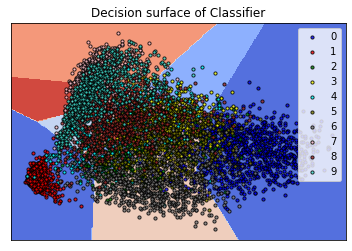

In [19]:
from sklearn.decomposition import PCA

# First fit the Classifier to the train data
clf = EuclideanDistanceClassifier()
clf.fit(X_train,y_train)

# Then perform PCA to the train data as well as the fitted values
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)

clf.X_mean_=pca.transform(clf.X_mean_)

# Plot results to a 2-dimensional space
labels = ["0","1","2","3","4","5","6","7","8","9"]
plot_clf(clf, X_train2, y_train, labels);

Last but not least we have to plot the Learnig Curve of the Classifier.

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    EuclideanDistanceClassifier(), X_full, y_full, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5), shuffle =True, random_state = 1312) #shuffle data and random_state for same results

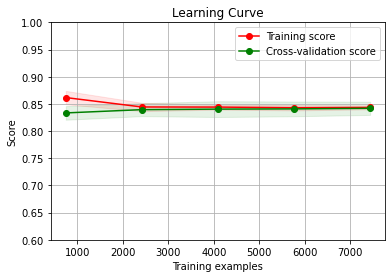

In [21]:
def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # calculate mean scores, std of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    # fill between each line with mean +- std
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot train and cv score
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1));

## Step 14

In [22]:
_, counts = np.unique(y_train, return_counts=True)
priors = counts/len(y_train)
print(np.sum(priors)==1) # to make sure those probabilities
print(priors)

True
[0.16376354 0.13784117 0.1002606  0.09024825 0.08942532 0.0762584
 0.09107118 0.08846523 0.07433823 0.08832808]


## Step 15

In [23]:
clf = CustomNBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7528649725959143

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[328   0   1   1   2   0  23   0   3   1]
 [  0 255   0   3   0   0   3   0   1   2]
 [  7   2 132  11  15   1   9   1  18   2]
 [  7   0   5 138   0   1   1   0  11   3]
 [  1  17   3   0 111   7   7  10   7  37]
 [ 19   0   2  47   6  55   8   0  15   8]
 [  9   1   4   3   4   1 140   0   8   0]
 [  1   3   0   2   3   1   0  71   4  62]
 [  0   3   1  18   3   4   0   1 134   2]
 [  0   5   0   0  13   1   0   2   9 147]]


In [25]:
cv = evaluate_custom_nb_classifier(X_full, y_full)
print('CV score for Custom Gaussian Naive Bayes Classifier is {}%'.format(cv*100))

CV score for Custom Gaussian Naive Bayes Classifier is 77.88764337399574%


              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       359
         1.0       0.91      0.96      0.94       264
         2.0       0.78      0.71      0.74       198
         3.0       0.92      0.47      0.62       166
         4.0       0.76      0.28      0.41       200
         5.0       0.80      0.46      0.59       160
         6.0       0.66      0.89      0.76       170
         7.0       0.85      0.90      0.87       147
         8.0       0.43      0.66      0.52       166
         9.0       0.45      0.86      0.59       177

    accuracy                           0.72      2007
   macro avg       0.75      0.70      0.69      2007
weighted avg       0.77      0.72      0.72      2007



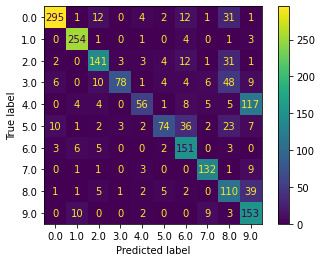

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, X_test, y_test);

In [27]:
cv = evaluate_sklearn_nb_classifier(X_full, y_full)
print('CV score for Gaussian Naive Bayes Classifier is {}%'.format(cv*100))

CV score for Gaussian Naive Bayes Classifier is 73.65028602497586%


## Step 16

Let's fit now our **`Custom Naive Bayes`** classifier but now assuming unit variance for all features.

In [28]:
clf = CustomNBClassifier(True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8126557050323866

In [29]:
print(confusion_matrix(y_test,y_pred))

[[297   0   2   3   4   2  39   1  10   1]
 [  0 259   0   1   2   0   2   0   0   0]
 [  6   0 145   8  17   3   2   2  15   0]
 [  7   0   4 131   1  14   0   0   7   2]
 [  1   6   5   0 150   1   5   2   2  28]
 [ 10   1   0   9   6 122   0   0   5   7]
 [ 14   0   4   0   4   4 143   0   1   0]
 [  0   2   2   0   8   0   0 117   2  16]
 [  4   2   3  11   7   6   0   1 127   5]
 [  0   5   0   0  16   1   0  11   4 140]]


## Step 17

In this step we fit Gaussian Naive Bayes, k-nn as well as SVM with linear and radial kernels. We shall begin with the Gaussian Naive Bayes.

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       359
         1.0       0.91      0.96      0.94       264
         2.0       0.78      0.71      0.74       198
         3.0       0.92      0.47      0.62       166
         4.0       0.76      0.28      0.41       200
         5.0       0.80      0.46      0.59       160
         6.0       0.66      0.89      0.76       170
         7.0       0.85      0.90      0.87       147
         8.0       0.43      0.66      0.52       166
         9.0       0.45      0.86      0.59       177

    accuracy                           0.72      2007
   macro avg       0.75      0.70      0.69      2007
weighted avg       0.77      0.72      0.72      2007



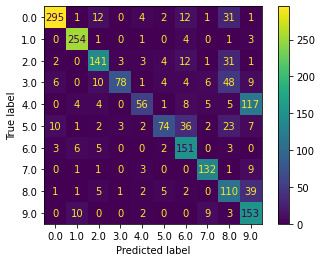

In [30]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, X_test, y_test);

In [31]:
cv = evaluate_sklearn_nb_classifier(X_full, y_full)
print('CV score for Gaussian Naive Bayes Classifier is {}%'.format(cv*100))

CV score for Gaussian Naive Bayes Classifier is 73.65028602497586%


In order to choose the number of k neighbors, we are going to use Cross Validatiion.

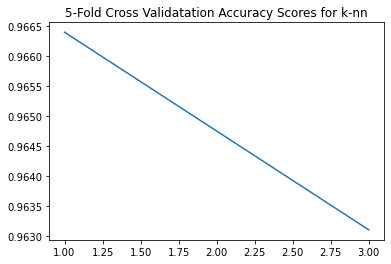

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

myList = list(range(1,5))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.plot(neighbors, cv_scores)
plt.title('5-Fold Cross Validatation Accuracy Scores for k-nn')
plt.show();

Now let's fit k-nn using k=1 neighbor to classify our images.

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       359
         1.0       0.98      0.97      0.97       264
         2.0       0.94      0.92      0.93       198
         3.0       0.92      0.93      0.92       166
         4.0       0.92      0.91      0.91       200
         5.0       0.94      0.91      0.92       160
         6.0       0.96      0.96      0.96       170
         7.0       0.93      0.95      0.94       147
         8.0       0.95      0.89      0.92       166
         9.0       0.91      0.95      0.93       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007



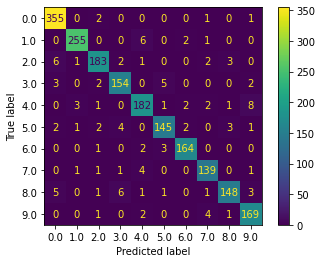

In [33]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, X_test, y_test);

In [34]:
cv = evaluate_knn_classifier(X_full, y_full)
print('CV score for k-nn Classifier (k = 1) is {}%'.format(cv*100))

CV score for k-nn Classifier (k = 1) is 96.74123560475915%


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       359
         1.0       0.99      0.97      0.98       264
         2.0       0.91      0.91      0.91       198
         3.0       0.83      0.88      0.86       166
         4.0       0.89      0.90      0.89       200
         5.0       0.87      0.85      0.86       160
         6.0       0.94      0.94      0.94       170
         7.0       0.92      0.92      0.92       147
         8.0       0.94      0.87      0.90       166
         9.0       0.95      0.96      0.96       177

    accuracy                           0.93      2007
   macro avg       0.92      0.92      0.92      2007
weighted avg       0.93      0.93      0.93      2007



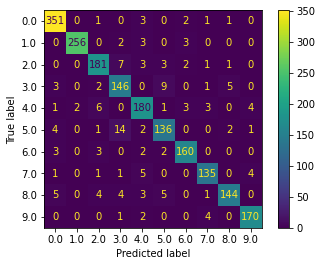

In [35]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, X_test, y_test);

In [36]:
cv = evaluate_linear_svm_classifier(X_full, y_full)
print('CV score for SVM Classifier (linear kernal) is {}%'.format(cv*100))

CV score for SVM Classifier (linear kernal) is 94.56876456876456%


              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       359
         1.0       1.00      0.96      0.98       264
         2.0       0.92      0.93      0.93       198
         3.0       0.95      0.89      0.92       166
         4.0       0.89      0.94      0.91       200
         5.0       0.90      0.94      0.92       160
         6.0       0.97      0.94      0.95       170
         7.0       0.97      0.94      0.96       147
         8.0       0.92      0.93      0.93       166
         9.0       0.95      0.96      0.96       177

    accuracy                           0.95      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.95      0.95      0.95      2007



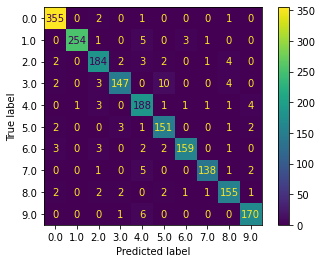

In [37]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, X_test, y_test);

In [38]:
cv = evaluate_rbf_svm_classifier(X_full, y_full)
print('CV score for SVM Classifier (radial kernal) is {}%'.format(cv*100))

CV score for SVM Classifier (radial kernal) is 97.32199644854731%


## Step 18


1) Voting Classifier using k-nn (k=1), Gaussian Naive Bayes, SVM (Radial Kernel) and choosing randomly between hard or soft voting.

In [39]:
np.random.seed(1312)
cv = evaluate_voting_classifier(X_full, y_full)
print('CV score for Voting Classifier is {}%'.format(cv*100))

Hard vote used for the Voting Classifier
CV score for Voting Classifier is 95.42918785102408%


2) Bagging Classifier for SVM (Radial Kernel)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       359
         1.0       1.00      0.97      0.98       264
         2.0       0.92      0.93      0.93       198
         3.0       0.94      0.89      0.91       166
         4.0       0.89      0.94      0.92       200
         5.0       0.89      0.94      0.91       160
         6.0       0.97      0.95      0.96       170
         7.0       0.98      0.93      0.95       147
         8.0       0.93      0.90      0.91       166
         9.0       0.95      0.96      0.96       177

    accuracy                           0.95      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.95      0.95      0.95      2007



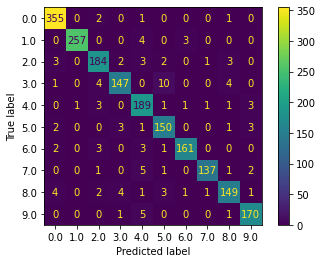

In [40]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=1312).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test);

In [41]:
cv = evaluate_bagging_classifier(X_full, y_full)
print('CV score for Bagging Classifier is {}%'.format(cv*100))

CV score for Bagging Classifier is 97.20368795803039%


## Step 19

In [42]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import KFold
from torch.utils.data import Dataset

### α)

In [43]:
class MyData(Dataset):
    def __init__(self,url="pr_lab1_2020-21_data"):
        self.url=url
        self.train = []
        self.test = []
    
    def load(self):
        train_url=self.url+"/train.txt"
        test_url=self.url+"/test.txt"
        self.xtrain=np.loadtxt(train_url, usecols=np.arange(1,257))
        self.ytrain = np.loadtxt(train_url, usecols=np.arange(1)) # READ column 0 from train.txt
        self.xtest = np.loadtxt(test_url, usecols=np.arange(1,257))
        self.ytest = np.loadtxt(test_url, usecols=np.arange(1))
        for i in range(len(self.xtrain)):
            self.train.append([self.xtrain[i], self.ytrain[i]])
        for i in range(len(self.xtest)):
            self.test.append([self.xtest[i], self.ytest[i]])

In [44]:
data=MyData()
data.load()
train_loader = DataLoader(data.train, batch_size=64, shuffle=True)
test_loader = DataLoader(data.test, batch_size=64, shuffle=False)

### β)

In [45]:
class NeuralNetA(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetA, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1], output_size)

        self.relu = nn.ReLU()
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
        out = self.LogSoftmax(self.layer3(out))
        return out
    
class NeuralNetB(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetB, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.layer4 = nn.Linear(hidden_size[2], output_size)
        self.bn1 = nn.BatchNorm1d(hidden_size[0])
        self.bn2 = nn.BatchNorm1d(hidden_size[1])
        self.bn3 = nn.BatchNorm1d(hidden_size[2])
        
        self.leaky = nn.LeakyReLU()
        self.Dropout=nn.Dropout(p=0.2)
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.leaky(self.bn1(self.layer1(x)))
        out = self.Dropout(out)
        out = self.leaky(self.bn2(self.layer2(out)))
        out = self.Dropout(out)
        out = self.leaky(self.bn3(self.layer3(out)))
        out = self.LogSoftmax(self.layer4(out))
        return out
    
class NeuralNetC(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetC, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.layer4 = nn.Linear(hidden_size[2], hidden_size[3])
        self.layer5 = nn.Linear(hidden_size[3], output_size)
        self.bn1 = nn.BatchNorm1d(hidden_size[0])
        self.bn2 = nn.BatchNorm1d(hidden_size[1])
        self.bn3 = nn.BatchNorm1d(hidden_size[2])
        self.bn4 = nn.BatchNorm1d(hidden_size[3])




        # Define relu activation and LogSoftmax output
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.leaky = nn.LeakyReLU()
        self.Dropout=nn.Dropout(p=0.2)
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.tanh(self.bn1(self.layer1(x)))
        out = self.Dropout(out)
        out = self.tanh(self.bn2(self.layer2(out)))
        out = self.Dropout(out)
        out = self.tanh(self.bn3(self.layer3(out)))
        out = self.LogSoftmax(self.layer4(out))
        return out
        
class NeuralNetD(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetD, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.layer4 = nn.Linear(hidden_size[2], hidden_size[3])
        self.layer5 = nn.Linear(hidden_size[3], output_size)
        self.bn1 = nn.BatchNorm1d(hidden_size[0])
        self.bn2 = nn.BatchNorm1d(hidden_size[1])
        self.bn3 = nn.BatchNorm1d(hidden_size[2])
        self.bn4 = nn.BatchNorm1d(hidden_size[3])




        # Define relu activation and LogSoftmax output
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.leaky = nn.LeakyReLU()
        self.Dropout=nn.Dropout(p=0.2)
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.leaky(self.bn1(self.layer1(x)))
        out = self.Dropout(out)
        out = self.leaky(self.bn2(self.layer2(out)))
        out = self.Dropout(out)
        out = self.leaky(self.bn3(self.layer3(out)))
        out = self.LogSoftmax(self.layer4(out))
        return out

In [46]:
netA = NeuralNetA(16*16, [128,64], 10)
netB = NeuralNetB(16*16, [128,64,32], 10)
netC = NeuralNetC(16*16, [128,64,32,16], 10)
netD = NeuralNetD(16*16, [128,64,32,16], 10)

criterion = nn.CrossEntropyLoss()

optimizerA = optim.Adam(netA.parameters(), lr=0.01)
optimizerB = optim.Adam(netB.parameters(), lr=0.01)
optimizerC = optim.Adam(netC.parameters(), lr=0.01)
optimizerD = optim.Adam(netD.parameters(), lr=0.01)

In [47]:
def training(model,optimizer,train_loader,epochs=15):
    model.train() 
    epoch_loss = []
    epoch_acc = []
    for epoch in range(epochs):
        running_average_loss = 0
        acc = 0
        samples = 0
        for i, data in enumerate(train_loader): # loop thorugh batches
            X_batch, y_batch = data # get the features and labels
            optimizer.zero_grad() # ALWAYS USE THIS!! 
            out = model(X_batch.float()) # forward pass
            val, y_pred = out.max(1) # get prediction labels in y_pred
            loss = criterion(out, y_batch.type(torch.LongTensor)) # compute per batch loss 
            loss.backward() # compurte gradients based on the loss function
            optimizer.step() # update weights 
            running_average_loss += loss.detach().item()
            acc += (y_batch == y_pred).sum().detach().item()
            samples+=len(X_batch)
        epoch_loss.append(float(running_average_loss) / (i + 1))
        epoch_acc.append(float(acc/samples))
        print("Epoch: {}  \t Loss {} \t Accuracy {} ".format(epoch+1, float(running_average_loss) / (i + 1), float(acc/samples)))
    return model,epoch_loss,epoch_acc

In [48]:
def score(model,test_loader):
    model.eval()
    acc = 0
    n_samples = 0
    with torch.no_grad(): # no gradients required!! eval mode, speeds up computation
        for i, data in enumerate(test_loader):
            X_batch, y_batch = data # test data and labels
            out = model(X_batch.float()) # get net's predictions
            val, y_pred = out.max(1) # argmax since output is a prob distribution
            acc += (y_batch == y_pred).sum().detach().item() # get accuracy
            n_samples += len(X_batch)

    print(acc / n_samples)

In [49]:
def plot_training(lossA,lossB,lossC,lossD,AccuracyA,AccuracyB,AccuracyC,AccuracyD):
    plt.plot(lossA)
    plt.plot(lossB)
    plt.plot(lossC)
    plt.plot(lossD)
    plt.plot(AccuracyA)
    plt.plot(AccuracyB)
    plt.plot(AccuracyC)
    plt.plot(AccuracyD)
    plt.title("Training")
    plt.xlabel('epoch')
    plt.legend(['lossA','lossB','lossC','lossD','AccuracyA','AccuracyB','AccuracyC','AccuracyD'], loc='upper left')
    axes = plt.gca()
    axes.set_ylim([0,1.2])
    plt.show()

In [50]:
trained_netA,lossA,accuracyA=training(netA,optimizerA,train_loader)

Epoch: 1  	 Loss 0.39434134535360754 	 Accuracy 0.8756000548621589 
Epoch: 2  	 Loss 0.16984851474530602 	 Accuracy 0.9493896584830613 
Epoch: 3  	 Loss 0.11898625379003454 	 Accuracy 0.9647510629543272 
Epoch: 4  	 Loss 0.10881470950124295 	 Accuracy 0.9647510629543272 
Epoch: 5  	 Loss 0.11141906965834399 	 Accuracy 0.966122616924976 
Epoch: 6  	 Loss 0.08791317251764172 	 Accuracy 0.9736661637635441 
Epoch: 7  	 Loss 0.05914934685151501 	 Accuracy 0.9813468659991771 
Epoch: 8  	 Loss 0.06007394396542702 	 Accuracy 0.982444109175696 
Epoch: 9  	 Loss 0.05920883336894851 	 Accuracy 0.9829927307639555 
Epoch: 10  	 Loss 0.056389512620323025 	 Accuracy 0.9836785077492799 
Epoch: 11  	 Loss 0.06633154498469371 	 Accuracy 0.9828555753668907 
Epoch: 12  	 Loss 0.07257567615651121 	 Accuracy 0.9813468659991771 
Epoch: 13  	 Loss 0.0854707783044177 	 Accuracy 0.9787409134549444 
Epoch: 14  	 Loss 0.0628693786691241 	 Accuracy 0.9831298861610205 
Epoch: 15  	 Loss 0.054618104658609876 	 Accur

In [51]:
trained_netB,lossB,accuracyB = training(netB,optimizerB,train_loader)

Epoch: 1  	 Loss 0.4775440138029425 	 Accuracy 0.8690165958030448 
Epoch: 2  	 Loss 0.21173982188236296 	 Accuracy 0.9363598957618983 
Epoch: 3  	 Loss 0.1552758935446802 	 Accuracy 0.9522699218214237 
Epoch: 4  	 Loss 0.14076765660980814 	 Accuracy 0.9592648470717323 
Epoch: 5  	 Loss 0.10508534768923071 	 Accuracy 0.9688657248662735 
Epoch: 6  	 Loss 0.09747931166764415 	 Accuracy 0.9696886572486627 
Epoch: 7  	 Loss 0.08670870208165102 	 Accuracy 0.9733918529694143 
Epoch: 8  	 Loss 0.07359875965324279 	 Accuracy 0.9768207378960362 
Epoch: 9  	 Loss 0.06894356634247263 	 Accuracy 0.9775065148813605 
Epoch: 10  	 Loss 0.07257576781251517 	 Accuracy 0.977095048690166 
Epoch: 11  	 Loss 0.058098049728167164 	 Accuracy 0.9809353998079824 
Epoch: 12  	 Loss 0.06222551767796017 	 Accuracy 0.9798381566314635 
Epoch: 13  	 Loss 0.05241695328272487 	 Accuracy 0.9838156631463448 
Epoch: 14  	 Loss 0.062099890546513756 	 Accuracy 0.9797010012343986 
Epoch: 15  	 Loss 0.052785279972707495 	 Acc

In [52]:
trained_netC,lossC,accuracyC = training(netC,optimizerC,train_loader)

Epoch: 1  	 Loss 0.5018832282931135 	 Accuracy 0.8782060074063914 
Epoch: 2  	 Loss 0.2149447027855275 	 Accuracy 0.9371828281442874 
Epoch: 3  	 Loss 0.1763919170684459 	 Accuracy 0.9445892195857907 
Epoch: 4  	 Loss 0.14403009542116993 	 Accuracy 0.9581676038952133 
Epoch: 5  	 Loss 0.12290868512763266 	 Accuracy 0.9636538197778083 
Epoch: 6  	 Loss 0.11525322600643624 	 Accuracy 0.9646139075572624 
Epoch: 7  	 Loss 0.10229899644802667 	 Accuracy 0.9703744342339871 
Epoch: 8  	 Loss 0.1019228092607176 	 Accuracy 0.9658483061308463 
Epoch: 9  	 Loss 0.0844044907819153 	 Accuracy 0.9740776299547387 
Epoch: 10  	 Loss 0.06403557485247259 	 Accuracy 0.9814840213962419 
Epoch: 11  	 Loss 0.07719654319481108 	 Accuracy 0.9768207378960362 
Epoch: 12  	 Loss 0.07898403287522103 	 Accuracy 0.9754491839253875 
Epoch: 13  	 Loss 0.0601695554347284 	 Accuracy 0.9806610890138527 
Epoch: 14  	 Loss 0.053765683306234054 	 Accuracy 0.9812097106021122 
Epoch: 15  	 Loss 0.05482017383052919 	 Accuracy

In [53]:
trained_netD,lossD,accuracyD = training(netD,optimizerD,train_loader)

Epoch: 1  	 Loss 0.5210048871997156 	 Accuracy 0.8591414072143739 
Epoch: 2  	 Loss 0.20835307341787898 	 Accuracy 0.9375942943354821 
Epoch: 3  	 Loss 0.146466179178995 	 Accuracy 0.9561102729392401 
Epoch: 4  	 Loss 0.13050810334256344 	 Accuracy 0.9607735564394458 
Epoch: 5  	 Loss 0.11620039916025442 	 Accuracy 0.9642024413660678 
Epoch: 6  	 Loss 0.09504065635663114 	 Accuracy 0.9711973666163763 
Epoch: 7  	 Loss 0.104835780092368 	 Accuracy 0.9692771910574681 
Epoch: 8  	 Loss 0.078753268223648 	 Accuracy 0.9768207378960362 
Epoch: 9  	 Loss 0.08000655591144766 	 Accuracy 0.9751748731312577 
Epoch: 10  	 Loss 0.06490690313410341 	 Accuracy 0.9786037580578796 
Epoch: 11  	 Loss 0.06314532828247665 	 Accuracy 0.982581264572761 
Epoch: 12  	 Loss 0.07389546690606758 	 Accuracy 0.9773693594842957 
Epoch: 13  	 Loss 0.056449862119431295 	 Accuracy 0.9840899739404746 
Epoch: 14  	 Loss 0.04663915158425082 	 Accuracy 0.9853243725140585 
Epoch: 15  	 Loss 0.04445968313232522 	 Accuracy 0

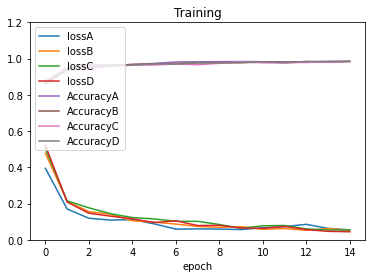

In [54]:
plot_training(lossA,lossB,lossC,lossD,accuracyA,accuracyB,accuracyC,accuracyD)

In [55]:
score(trained_netA,test_loader)
score(trained_netB,test_loader)
score(trained_netC,test_loader)
score(trained_netD,test_loader)

0.9337319382162431
0.9417040358744395
0.935226706527155
0.9402092675635276


In [56]:
netA1 = NeuralNetA(16*16, [128,64], 10)
netB1 = NeuralNetB(16*16, [128,64,32], 10)
netC1 = NeuralNetC(16*16, [128,64,32,16], 10)
netD1 = NeuralNetD(16*16, [128,64,32,16], 10)

criterion = nn.CrossEntropyLoss()

optimizerA1 = optim.Adam(netA1.parameters(), lr=0.001)
optimizerB1 = optim.Adam(netB1.parameters(), lr=0.1)
optimizerC1 = optim.Adam(netC1.parameters(), lr=0.001)
optimizerD1 = optim.Adam(netD1.parameters(), lr=0.1)

In [57]:
trained_netA1,lossA1,accuracyA1=training(netA1,optimizerA1,train_loader)

Epoch: 1  	 Loss 0.7170665126882101 	 Accuracy 0.80331916060897 
Epoch: 2  	 Loss 0.20440644836216643 	 Accuracy 0.9403374022767796 
Epoch: 3  	 Loss 0.15579929970727677 	 Accuracy 0.9556988067480455 
Epoch: 4  	 Loss 0.12071028440014313 	 Accuracy 0.9668083939103004 
Epoch: 5  	 Loss 0.0985516426398566 	 Accuracy 0.9711973666163763 
Epoch: 6  	 Loss 0.07977245242351241 	 Accuracy 0.9762721163077767 
Epoch: 7  	 Loss 0.06430440382999286 	 Accuracy 0.9817583321903717 
Epoch: 8  	 Loss 0.05280416611206244 	 Accuracy 0.9854615279111233 
Epoch: 9  	 Loss 0.04295772428444603 	 Accuracy 0.9887532574406803 
Epoch: 10  	 Loss 0.03487942547112573 	 Accuracy 0.990261966808394 
Epoch: 11  	 Loss 0.026779008377751892 	 Accuracy 0.9939651625291456 
Epoch: 12  	 Loss 0.021528857758088986 	 Accuracy 0.9954738718968591 
Epoch: 13  	 Loss 0.019249667258312304 	 Accuracy 0.9972568920587025 
Epoch: 14  	 Loss 0.014409502068526325 	 Accuracy 0.9973940474557674 
Epoch: 15  	 Loss 0.013174166623094495 	 Acc

In [58]:
trained_netB1,lossB1,accuracyB1=training(netB1,optimizerB1,train_loader)

Epoch: 1  	 Loss 0.6188026013081533 	 Accuracy 0.8005760526676725 
Epoch: 2  	 Loss 0.3122533374188239 	 Accuracy 0.9072829515841448 
Epoch: 3  	 Loss 0.28052172976496975 	 Accuracy 0.9199012481141133 
Epoch: 4  	 Loss 0.21575488947462618 	 Accuracy 0.9369085173501577 
Epoch: 5  	 Loss 0.2010867274448014 	 Accuracy 0.9434919764092717 
Epoch: 6  	 Loss 0.17872402429776757 	 Accuracy 0.9445892195857907 
Epoch: 7  	 Loss 0.17279516247901738 	 Accuracy 0.9474694829241531 
Epoch: 8  	 Loss 0.17027899409693323 	 Accuracy 0.9521327664243588 
Epoch: 9  	 Loss 0.1633207188069559 	 Accuracy 0.9536414757920724 
Epoch: 10  	 Loss 0.15014010948831574 	 Accuracy 0.9565217391304348 
Epoch: 11  	 Loss 0.13504077617503835 	 Accuracy 0.9611850226306405 
Epoch: 12  	 Loss 0.14462970960231727 	 Accuracy 0.9576189823069537 
Epoch: 13  	 Loss 0.10533764700429808 	 Accuracy 0.9688657248662735 
Epoch: 14  	 Loss 0.1316488786669971 	 Accuracy 0.9624194212042244 
Epoch: 15  	 Loss 0.10159057779482712 	 Accuracy

In [59]:
trained_netC1,lossC1,accuracyC1=training(netC1,optimizerC1,train_loader)

Epoch: 1  	 Loss 1.18594589568021 	 Accuracy 0.825126868742285 
Epoch: 2  	 Loss 0.46361317015007925 	 Accuracy 0.9277191057468112 
Epoch: 3  	 Loss 0.2881695858872773 	 Accuracy 0.9451378411740502 
Epoch: 4  	 Loss 0.21418664597889833 	 Accuracy 0.9544644081744617 
Epoch: 5  	 Loss 0.17732281061379532 	 Accuracy 0.9592648470717323 
Epoch: 6  	 Loss 0.15303004317377744 	 Accuracy 0.9637909751748731 
Epoch: 7  	 Loss 0.13065492731045214 	 Accuracy 0.9688657248662735 
Epoch: 8  	 Loss 0.11621390488979064 	 Accuracy 0.9695515018515979 
Epoch: 9  	 Loss 0.10851088254467438 	 Accuracy 0.9728432313811548 
Epoch: 10  	 Loss 0.09412169417268351 	 Accuracy 0.9766835824989714 
Epoch: 11  	 Loss 0.08671788186684512 	 Accuracy 0.9779179810725552 
Epoch: 12  	 Loss 0.07448266565865069 	 Accuracy 0.9794266904402689 
Epoch: 13  	 Loss 0.07421749349879592 	 Accuracy 0.9798381566314635 
Epoch: 14  	 Loss 0.07276976905076911 	 Accuracy 0.9809353998079824 
Epoch: 15  	 Loss 0.06462441760589156 	 Accuracy

In [60]:
trained_netD1,lossD1,accuracyD1=training(netD1,optimizerD1,train_loader)

Epoch: 1  	 Loss 0.5968103804217096 	 Accuracy 0.8088053764915649 
Epoch: 2  	 Loss 0.3285740134224557 	 Accuracy 0.9070086407900151 
Epoch: 3  	 Loss 0.25785825591076883 	 Accuracy 0.9288163489233301 
Epoch: 4  	 Loss 0.21442461066078722 	 Accuracy 0.9393773144973254 
Epoch: 5  	 Loss 0.22894829493669563 	 Accuracy 0.9356741187765738 
Epoch: 6  	 Loss 0.204955430701375 	 Accuracy 0.9448635303799204 
Epoch: 7  	 Loss 0.1916701490255563 	 Accuracy 0.943217665615142 
Epoch: 8  	 Loss 0.17950296563733564 	 Accuracy 0.9474694829241531 
Epoch: 9  	 Loss 0.17247526481616915 	 Accuracy 0.9525442326155534 
Epoch: 10  	 Loss 0.15057480396506817 	 Accuracy 0.9598134686599917 
Epoch: 11  	 Loss 0.14583823200021134 	 Accuracy 0.9578932931010835 
Epoch: 12  	 Loss 0.14411042937845514 	 Accuracy 0.9603620902482513 
Epoch: 13  	 Loss 0.10590509031980969 	 Accuracy 0.9696886572486627 
Epoch: 14  	 Loss 0.13830756333150102 	 Accuracy 0.9635166643807433 
Epoch: 15  	 Loss 0.11420562382575059 	 Accuracy 

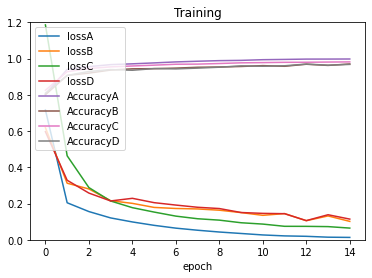

In [61]:
plot_training(lossA1,lossB1,lossC1,lossD1,accuracyA1,accuracyB1,accuracyC1,accuracyD1)

In [62]:
score(trained_netA1,test_loader)
score(trained_netB1,test_loader)
score(trained_netC1,test_loader)
score(trained_netD1,test_loader)

0.9332336821126059
0.9422022919780767
0.935226706527155
0.935226706527155


In [63]:
netA2 = NeuralNetA(16*16, [128,64], 10)
netB2 = NeuralNetB(16*16, [128,64,32], 10)
netC2 = NeuralNetC(16*16, [128,64,32,16], 10)
netD2 = NeuralNetD(16*16, [128,64,32,16], 10)

criterion = nn.CrossEntropyLoss()

optimizerA2 = optim.RMSprop(netA2.parameters(), lr=0.001)
optimizerB2 = optim.SGD(netB2.parameters(), lr=0.1)
optimizerC2 = optim.Adagrad(netC2.parameters(), lr=0.001)
optimizerD2 = optim.Adadelta(netD2.parameters(), lr=0.1)

In [64]:
trained_netA2,lossA2,accuracyA2=training(netA2,optimizerA2,train_loader)

Epoch: 1  	 Loss 0.4298458275826354 	 Accuracy 0.8654505554793581 
Epoch: 2  	 Loss 0.16691131932301478 	 Accuracy 0.9498011246742559 
Epoch: 3  	 Loss 0.12271693870098445 	 Accuracy 0.9637909751748731 
Epoch: 4  	 Loss 0.09456141840405109 	 Accuracy 0.9732546975723495 
Epoch: 5  	 Loss 0.07597700448445323 	 Accuracy 0.9783294472637498 
Epoch: 6  	 Loss 0.059311092863872386 	 Accuracy 0.9817583321903717 
Epoch: 7  	 Loss 0.045937207490695936 	 Accuracy 0.9851872171169935 
Epoch: 8  	 Loss 0.04094504993899088 	 Accuracy 0.988067480455356 
Epoch: 9  	 Loss 0.027591177891417032 	 Accuracy 0.993416540940886 
Epoch: 10  	 Loss 0.027188054943587957 	 Accuracy 0.992319297764367 
Epoch: 11  	 Loss 0.018715940703833967 	 Accuracy 0.9961596488821836 
Epoch: 12  	 Loss 0.023163080469729674 	 Accuracy 0.9950624057056645 
Epoch: 13  	 Loss 0.011695553888178742 	 Accuracy 0.9979426690440268 
Epoch: 14  	 Loss 0.012571581043486827 	 Accuracy 0.9965711150733781 
Epoch: 15  	 Loss 0.011813715992550562 

In [65]:
trained_netB2,lossB2,accuracyB2=training(netB2,optimizerB2,train_loader)

Epoch: 1  	 Loss 0.7659715824482733 	 Accuracy 0.8226580715951173 
Epoch: 2  	 Loss 0.27188312229618694 	 Accuracy 0.9303250582910437 
Epoch: 3  	 Loss 0.19665681342022462 	 Accuracy 0.9484295707036072 
Epoch: 4  	 Loss 0.15089320201884238 	 Accuracy 0.956247428336305 
Epoch: 5  	 Loss 0.137790287240294 	 Accuracy 0.9583047592922781 
Epoch: 6  	 Loss 0.11643591800933345 	 Accuracy 0.9655739953367165 
Epoch: 7  	 Loss 0.10710433120594214 	 Accuracy 0.969414346454533 
Epoch: 8  	 Loss 0.08624778485350441 	 Accuracy 0.9735290083664793 
Epoch: 9  	 Loss 0.07935827428050209 	 Accuracy 0.977095048690166 
Epoch: 10  	 Loss 0.07435821239395361 	 Accuracy 0.9766835824989714 
Epoch: 11  	 Loss 0.07409450502477978 	 Accuracy 0.9777808256754903 
Epoch: 12  	 Loss 0.056907633826005874 	 Accuracy 0.9834041969551501 
Epoch: 13  	 Loss 0.0578171641733334 	 Accuracy 0.9821697983815663 
Epoch: 14  	 Loss 0.05639756680874709 	 Accuracy 0.9828555753668907 
Epoch: 15  	 Loss 0.05737012290608203 	 Accuracy 

In [66]:
trained_netC2,lossC2,accuracyC2=training(netC2,optimizerC2,train_loader)

Epoch: 1  	 Loss 1.7873952880240322 	 Accuracy 0.6783705938828692 
Epoch: 2  	 Loss 1.4464165976173 	 Accuracy 0.8070223563297215 
Epoch: 3  	 Loss 1.3044744960048742 	 Accuracy 0.8457001783020162 
Epoch: 4  	 Loss 1.2162819692963047 	 Accuracy 0.8624331367439309 
Epoch: 5  	 Loss 1.139924976386522 	 Accuracy 0.8776573858181319 
Epoch: 6  	 Loss 1.080896873223154 	 Accuracy 0.8856123988478947 
Epoch: 7  	 Loss 1.030430647364834 	 Accuracy 0.8912357701275545 
Epoch: 8  	 Loss 0.9846639361297875 	 Accuracy 0.9000137155397064 
Epoch: 9  	 Loss 0.945394007783187 	 Accuracy 0.9030311342751337 
Epoch: 10  	 Loss 0.9125429820596126 	 Accuracy 0.9087916609518585 
Epoch: 11  	 Loss 0.8817607650631353 	 Accuracy 0.9094774379371828 
Epoch: 12  	 Loss 0.8518024750968867 	 Accuracy 0.9141407214373886 
Epoch: 13  	 Loss 0.8246461482424485 	 Accuracy 0.9172952955698807 
Epoch: 14  	 Loss 0.8022618319904595 	 Accuracy 0.9151008092168427 
Epoch: 15  	 Loss 0.7767890770184366 	 Accuracy 0.92127280208476

In [67]:
trained_netD2,lossD2,accuracyD2=training(netD2,optimizerD2,train_loader)

Epoch: 1  	 Loss 1.9520468220376133 	 Accuracy 0.5926484707173227 
Epoch: 2  	 Loss 1.0941395017138698 	 Accuracy 0.861198738170347 
Epoch: 3  	 Loss 0.6661468995244879 	 Accuracy 0.9107118365107667 
Epoch: 4  	 Loss 0.44764294488388195 	 Accuracy 0.9292278151145248 
Epoch: 5  	 Loss 0.3345318192191291 	 Accuracy 0.9406117130709093 
Epoch: 6  	 Loss 0.2691155372743021 	 Accuracy 0.9447263749828556 
Epoch: 7  	 Loss 0.2241963344184976 	 Accuracy 0.9504869016595803 
Epoch: 8  	 Loss 0.19831529017864613 	 Accuracy 0.9556988067480455 
Epoch: 9  	 Loss 0.16808888178906942 	 Accuracy 0.9629680427924839 
Epoch: 10  	 Loss 0.15044741025357916 	 Accuracy 0.965025373748457 
Epoch: 11  	 Loss 0.14484531883346408 	 Accuracy 0.9644767521601975 
Epoch: 12  	 Loss 0.12975386239326836 	 Accuracy 0.9692771910574681 
Epoch: 13  	 Loss 0.1197388512000703 	 Accuracy 0.9687285694692086 
Epoch: 14  	 Loss 0.1029288489698318 	 Accuracy 0.9731175421752846 
Epoch: 15  	 Loss 0.10618487289665561 	 Accuracy 0.97

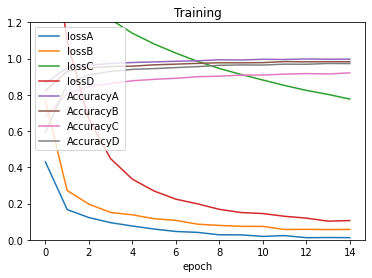

In [68]:
plot_training(lossA2,lossB2,lossC2,lossD2,accuracyA2,accuracyB2,accuracyC2,accuracyD2)

In [69]:
score(trained_netA2,test_loader)
score(trained_netB2,test_loader)
score(trained_netC2,test_loader)
score(trained_netD2,test_loader)

0.9367214748380668
0.9407075236671649
0.8844045839561535
0.9407075236671649


### γ)

##### Διαλέγουμε το μοντέλο Β2

In [70]:
from lib import *

X_train = np.loadtxt("pr_lab1_2020-21_data/train.txt", usecols=np.arange(1,257)) # READ column 1-257 from train.txt
y_train = np.loadtxt("pr_lab1_2020-21_data/train.txt", usecols=np.arange(1)) # READ column 0 from train.txt

X_test = np.loadtxt("pr_lab1_2020-21_data/test.txt", usecols=np.arange(1,257)) # READ column 1-257 from test.txt
y_test = np.loadtxt("pr_lab1_2020-21_data/test.txt", usecols=np.arange(1)) # # READ column 0 from test.txt

In [71]:
model=PytorchNNModel(12,256,[128,64,32],10)

In [72]:
model.fit(data.xtrain,data.ytrain,verbose=1)

Epoch: 1  	 Loss 1.8370593254980834 	 Accuracy 0.4482167352537723 	 Val_Accuracy 0.7065217391304348 
Epoch: 2  	 Loss 1.3427121755869493 	 Accuracy 0.6817558299039781 	 Val_Accuracy 0.5978260869565217 
Epoch: 3  	 Loss 1.0729352546774822 	 Accuracy 0.7832647462277091 	 Val_Accuracy 0.7391304347826086 
Epoch: 4  	 Loss 0.8683985070041988 	 Accuracy 0.8377914951989026 	 Val_Accuracy 0.7771739130434783 
Epoch: 5  	 Loss 0.7183826649966447 	 Accuracy 0.8664266117969822 	 Val_Accuracy 0.6630434782608695 
Epoch: 6  	 Loss 0.5954059041712595 	 Accuracy 0.8880315500685871 	 Val_Accuracy 0.9510869565217391 
Epoch: 7  	 Loss 0.5281652351436408 	 Accuracy 0.8936899862825789 	 Val_Accuracy 0.907608695652174 
Epoch: 8  	 Loss 0.4608221316467161 	 Accuracy 0.9134087791495199 	 Val_Accuracy 0.8641304347826086 
Epoch: 9  	 Loss 0.40802362949951837 	 Accuracy 0.9207818930041153 	 Val_Accuracy 0.7880434782608695 
Epoch: 10  	 Loss 0.37317016688377963 	 Accuracy 0.9214677640603567 	 Val_Accuracy 0.695652

###  δ)

In [73]:
model.score(data.xtest,data.ytest)

0.8305929247633284

In [74]:
X_all=np.vstack((data.xtrain,data.xtest))

y_train_new=np.expand_dims(data.ytrain, axis=1)
y_test_new=np.expand_dims(data.ytest, axis=1)
y_all_mid=np.vstack((y_train_new,y_test_new))

y_all=np.squeeze(y_all_mid)

In [75]:
evaluate_nn_classifier(X_all,y_all)



--------------------- FOLD 0/4 ---------------------
 
0.9575268817204301


--------------------- FOLD 1/4 ---------------------
 
0.9263440860215054


--------------------- FOLD 2/4 ---------------------
 
0.9381720430107527


--------------------- FOLD 3/4 ---------------------
 
0.9327595481441635


--------------------- FOLD 4/4 ---------------------
 
0.9133942980096826


0.933639371381307